In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('ggp-log-gens-15games.txt')
#df = pd.read_csv('ggp-test-log-2.txt')
df.head()

,tpgGen,envGen,frames,envName,tpgMin,tpgMax,tpgAvg,envFit,championSize,totalTeams,totalRootTeams
0,1,1,200,DoubleDunk-v0,-4.0,2.0,-0.241333,0.951045,4,751,679
1,2,1,200,Freeway-v0,0.0,2.0,0.069219,0.032728,4,751,647
2,3,1,200,Alien-v0,0.0,180.0,56.043277,0.485279,3,751,612
3,4,1,200,Atlantis-v0,0.0,800.0,15.196078,0.035358,6,750,590
4,5,1,200,FishingDerby-v0,-6.0,0.0,-5.981356,0.003850,11,750,601


In [25]:
df.describe()

,tpgGen,envGen,frames,tpgMin,tpgMax,tpgAvg,envFit,championSize,totalTeams,totalRootTeams
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,550.500000,12.727273,1665.909091,54.643636,2490.790000,734.610119,0.492097,115.183636,750.514545,447.820909
std,317.686953,7.062581,1689.627832,284.671278,5164.090176,1688.778957,0.366538,152.111247,0.500016,34.966769
min,1.000000,1.000000,200.000000,-100.000000,-99.000000,-99.000000,0.000000,3.000000,750.000000,395.000000
25%,275.750000,7.000000,500.000000,-2.000000,2.000000,-0.017920,0.045313,10.000000,750.000000,425.000000
50%,550.500000,13.000000,1000.000000,0.000000,150.000000,9.765955,0.542308,42.500000,751.000000,436.500000
75%,825.250000,19.000000,2000.000000,0.000000,1500.000000,582.013035,0.871304,158.000000,751.000000,463.000000
max,1100.000000,25.000000,5000.000000,1500.000000,22933.000000,7791.469194,0.995964,635.000000,751.000000,679.000000


In [26]:
envDfs = []
for envName in pd.unique(df.envName):
    envDfs.append(df.loc[df['envName'] == envName])

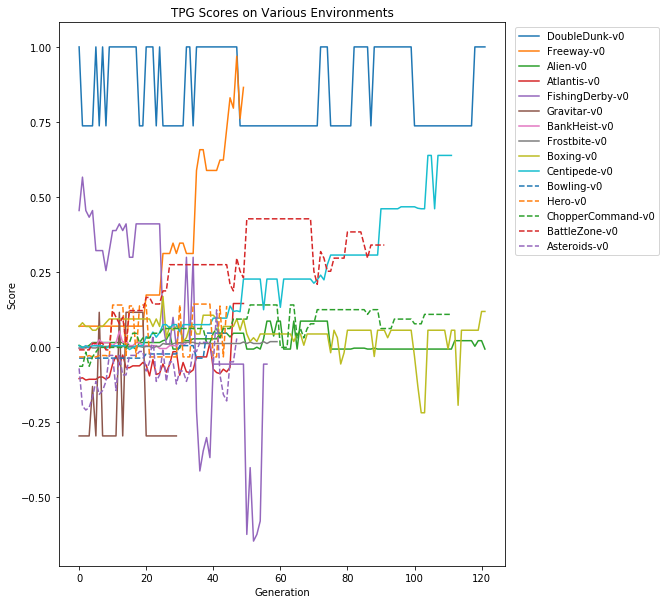

In [27]:
# on 1000 frame episodes, average of 20 episodes
soloRandomScores = {
     'Alien-v0': 163.0,'Asteroids-v0': 745.0,'Atlantis-v0': 9270.0,'BankHeist-v0': 15.5,
     'BattleZone-v0': 1450.0,'Bowling-v0': 8.05,'Boxing-v0': -3.45,'Centipede-v0': 2107.75,
     'ChopperCommand-v0': 710.0,'DoubleDunk-v0': -5.6,'FishingDerby-v0': -40.85,
     'Freeway-v0': 0.0,'Frostbite-v0': 67.5,'Gravitar-v0': 180.0,'Hero-v0': 533.25,
     'IceHockey-v0': -2.7,'Jamesbond-v0': 27.5,'Kangaroo-v0': 60.0,'Krull-v0': 639.45,
     'KungFuMaster-v0': 440.0,'MsPacman-v0': 188.5,'PrivateEye-v0': 25.0,
     'RoadRunner-v0': 15.0,'Tennis-v0': -10.5,'TimePilot-v0': 520.0,
     'UpNDown-v0': 400.5,'Venture-v0': 0.0,'WizardOfWor-v0': 335.0,'Zaxxon-v0': 20.0}

soloTpgScores = {
     'Alien-v0': 3382.7,'Asteroids-v0': 3050.7,'Atlantis-v0': 89653,'BankHeist-v0': 1051,
     'BattleZone-v0': 47233.4,'Bowling-v0': 223.7,'Boxing-v0': 76.5,'Centipede-v0': 34731.7,
     'ChopperCommand-v0': 7070,'DoubleDunk-v0': 2,'FishingDerby-v0': 49,
     'Freeway-v0': 28.9,'Frostbite-v0': 8144.4,'Gravitar-v0': 786.7,'Hero-v0': 16545.4,
     'IceHockey-v0': 10,'Jamesbond-v0': 3120,'Kangaroo-v0': 14780,'Krull-v0': 12850.4,
     'KungFuMaster-v0': 43353.4,'MsPacman-v0': 5156,'PrivateEye-v0': 15028.3,
     'RoadRunner-v0': 17410,'Tennis-v0': 1,'TimePilot-v0': 13540,
     'RoadRunner-v0': 17410,'Tennis-v0': 0,'TimePilot-v0': 13540,
     'UpNDown-v0': 34416,'Venture-v0': 576.7,'WizardOfWor-v0': 5196.7,'Zaxxon-v0': 6233.4}

# 10 colors in cycle
plt.figure(figsize=(8,10))
cnt = 0
lineStyles = ['-', '--', '-.']
lsi = 0
for edf in envDfs:
    cnt += 1
    plt.plot(((edf.tpgMax-soloRandomScores[edf.envName.iloc[0]])/
                   (soloTpgScores[edf.envName.iloc[0]]-soloRandomScores[edf.envName.iloc[0]])).tolist(), 
             label=edf.envName.iloc[0], ls=lineStyles[lsi])
    if cnt == 10:
        cnt = 0
        lsi += 1
plt.legend(loc=2, bbox_to_anchor=(1.01, 1.0))
plt.xlabel('Generation')
plt.ylabel('Score')
plt.title('TPG Scores on Various Environments')
plt.show()

In [6]:
df = pd.read_csv('ggp-test-log-2-multiperf.txt')
pd.set_option('display.max_columns', 500)
df.head(20)

,tpgGen,envGen,trainFrames,teamId,scoreAlien-v0,scoreAsteroids-v0,scoreAtlantis-v0,scoreBankHeist-v0,scoreBattleZone-v0,scoreBowling-v0,scoreBoxing-v0,scoreCentipede-v0,scoreChopperCommand-v0,scoreDoubleDunk-v0,scoreFishingDerby-v0,scoreFreeway-v0,scoreFrostbite-v0,scoreGravitar-v0,scoreHero-v0,scoreIceHockey-v0,scoreJamesbond-v0,scoreKangaroo-v0,scoreKrull-v0,scoreKungFuMaster-v0,scoreMsPacman-v0,scorePrivateEye-v0,scoreRoadRunner-v0,scoreSkiing-v0,scoreTennis-v0,scoreTimePilot-v0,scoreUpNDown-v0,scoreVenture-v0,scoreWizardOfWor-v0,scoreZaxxon-v0,visAlien-v0,visAsteroids-v0,visAtlantis-v0,visBankHeist-v0,visBattleZone-v0,visBowling-v0,visBoxing-v0,visCentipede-v0,visChopperCommand-v0,visDoubleDunk-v0,visFishingDerby-v0,visFreeway-v0,visFrostbite-v0,visGravitar-v0,visHero-v0,visIceHockey-v0,visJamesbond-v0,visKangaroo-v0,visKrull-v0,visKungFuMaster-v0,visMsPacman-v0,visPrivateEye-v0,visRoadRunner-v0,visSkiing-v0,visTennis-v0,visTimePilot-v0,visUpNDown-v0,visVenture-v0,visWizardOfWor-v0,visZaxxon-v0,visTotal
0,675,15,1000,84289,139.666667,168.000000,1540.000000,1.000000,0.000000,0.0,-99.666667,164.833333,0.000000,-0.600000,-99.000000,0.0,80.000000,0.000000,0.0,-3.400000,0.0,0.0,0.0,0.0,70.0,0.000000,380.000000,-13486.833333,-0.966667,500.000000,2188.666667,0.0,100.000000,0.0,0.020635,0.123016,0.071693,0.017196,0.084656,0.017196,0.020635,0.071649,0.020635,0.071649,0.020106,0.060582,0.020106,0.026455,0.020106,0.072222,0.075661,0.020106,0.064550,0.020635,0.020635,0.061111,0.026455,0.014330,0.017196,0.020635,0.062169,0.117196,0.017196,0.085185,0.192063
1,675,15,1000,12970,139.333333,193.333333,1523.333333,0.000000,0.000000,0.0,-97.000000,182.733333,13.333333,-0.466667,-99.000000,0.0,0.666667,0.000000,0.0,-8.200000,0.0,0.0,1019.5,0.0,70.0,-790.800000,970.000000,-13373.666667,-23.466667,406.666667,700.333333,0.0,300.000000,0.0,0.039153,0.041534,0.039153,0.021605,0.041534,0.039153,0.039153,0.021605,0.039153,0.021605,0.026455,0.039153,0.026455,0.026455,0.041534,0.041534,0.041534,0.026455,0.039153,0.039153,0.026455,0.026455,0.026455,0.032628,0.032628,0.039153,0.039153,0.026455,0.021605,0.041534,0.069048
2,675,15,1000,45420,139.333333,133.000000,1520.000000,1.333333,833.333333,30.1,-50.700000,1630.033333,400.000000,-0.933333,-98.933333,0.0,0.333333,8.333333,0.0,-19.200000,0.0,0.0,28.2,0.0,60.0,0.000000,366.666667,-14379.000000,-0.966667,403.333333,20.666667,0.0,0.000000,0.0,0.012169,0.012169,0.012169,0.010141,0.012169,0.011905,0.012169,0.010141,0.011905,0.010141,0.011905,0.012169,0.011905,0.012169,0.011905,0.012169,0.012169,0.012169,0.012169,0.011905,0.012169,0.012169,0.012169,0.009921,0.009921,0.012169,0.012169,0.012169,0.010141,0.012169,0.019312
3,675,15,1000,65582,139.666667,243.333333,7953.333333,0.666667,0.000000,0.0,-99.866667,306.500000,0.000000,-0.866667,-99.000000,0.0,79.000000,0.000000,0.0,-23.000000,0.0,0.0,1061.8,0.0,70.0,-1000.000000,953.333333,-12602.900000,-0.966667,403.333333,849.333333,0.0,300.000000,0.0,0.080688,0.127513,0.094974,0.098325,0.094709,0.080688,0.080423,0.059744,0.081481,0.031085,0.081481,0.082011,0.061640,0.071958,0.084921,0.037831,0.043915,0.080688,0.122751,0.080688,0.080688,0.080688,0.093915,0.066578,0.066578,0.080688,0.043122,0.071958,0.052910,0.113228,0.252646
4,675,15,1000,64044,29.333333,133.333333,1500.000000,1.000000,0.000000,30.0,-51.333333,172.833333,403.333333,-0.933333,-98.933333,0.0,0.333333,8.333333,0.0,-3.300000,0.0,0.0,0.0,0.0,70.0,0.000000,673.333333,-13732.300000,-0.933333,403.333333,93.666667,0.0,0.000000,0.0,0.012434,0.121958,0.038095,0.010362,0.012434,0.012434,0.012434,0.010362,0.012434,0.010362,0.012434,0.036243,0.012434,0.012434,0.012434,0.012434,0.012434,0.012434,0.053968,0.012434,0.012434,0.012434,0.012434,0.010362,0.010362,0.012434,0.041534,0.012434,0.010362,0.036243,0.140476
5,1350,30,5000,94529,138.666667,277.666667,1520.000000,0.666667,6266.666667,0.0,-37.066667,8456.366667,0.000000,-0.866667,-99.000000,0.0,77.666667,0.000000,0.0,-21.766667,0.0,0.0,117.0,0.0,60.0,-1000.000000,0.

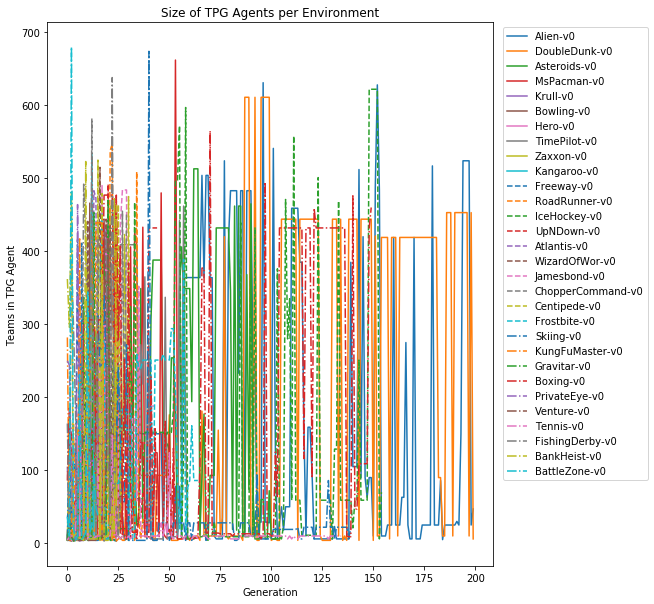

In [7]:
plt.figure(figsize=(8,10))
cnt = 0
lineStyles = ['-', '--', '-.']
lsi = 0
for edf in envDfs:
    cnt += 1
    plt.plot(edf.bestSize.tolist(), label=edf.envName.iloc[0], ls=lineStyles[lsi])
    if cnt == 10:
        cnt = 0
        lsi += 1
plt.legend(loc=2, bbox_to_anchor=(1.01, 1.0))
plt.xlabel('Generation')
plt.ylabel('Teams in TPG Agent')
plt.title('Size of TPG Agents per Environment')
plt.show()

In [8]:
df = pd.read_csv('ggp-test-log-2-pos.txt')
df.head()

,tpgGen,envGen,trainFrames,1st-Alien-v0,1st-Asteroids-v0,1st-Atlantis-v0,1st-BankHeist-v0,1st-BattleZone-v0,1st-Bowling-v0,1st-Boxing-v0,1st-Centipede-v0,1st-ChopperCommand-v0,1st-DoubleDunk-v0,1st-FishingDerby-v0,1st-Freeway-v0,1st-Frostbite-v0,1st-Gravitar-v0,1st-Hero-v0,1st-IceHockey-v0,1st-Jamesbond-v0,1st-Kangaroo-v0,1st-Krull-v0,1st-KungFuMaster-v0,1st-MsPacman-v0,1st-PrivateEye-v0,1st-RoadRunner-v0,1st-Skiing-v0,1st-Tennis-v0,1st-TimePilot-v0,1st-UpNDown-v0,1st-Venture-v0,1st-WizardOfWor-v0,1st-Zaxxon-v0,2nd-Alien-v0,2nd-Asteroids-v0,2nd-Atlantis-v0,2nd-BankHeist-v0,2nd-BattleZone-v0,2nd-Bowling-v0,2nd-Boxing-v0,2nd-Centipede-v0,2nd-ChopperCommand-v0,2nd-DoubleDunk-v0,2nd-FishingDerby-v0,2nd-Freeway-v0,2nd-Frostbite-v0,2nd-Gravitar-v0,2nd-Hero-v0,2nd-IceHockey-v0,2nd-Jamesbond-v0,2nd-Kangaroo-v0,2nd-Krull-v0,2nd-KungFuMaster-v0,2nd-MsPacman-v0,2nd-PrivateEye-v0,2nd-RoadRunner-v0,2nd-Skiing-v0,2nd-Tennis-v0,2nd-TimePilot-v0,2nd-UpNDown-v0,2nd-Venture-v0,2nd-WizardOfWor-v0,2nd-Zaxxon-v0,3rd-Alien-v0,3rd-Asteroids-v0,3rd-Atlantis-v0,3rd-BankHeist-v0,3rd-BattleZone-v0,3rd-Bowling-v0,3rd-Boxing-v0,3rd-Centipede-v0,3rd-ChopperCommand-v0,3rd-DoubleDunk-v0,3rd-FishingDerby-v0,3rd-Freeway-v0,3rd-Frostbite-v0,3rd-Gravitar-v0,3rd-Hero-v0,3rd-IceHockey-v0,3rd-Jamesbond-v0,3rd-Kangaroo-v0,3rd-Krull-v0,3rd-KungFuMaster-v0,3rd-MsPacman-v0,3rd-PrivateEye-v0,3rd-RoadRunner-v0,3rd-Skiing-v0,3rd-Tennis-v0,3rd-TimePilot-v0,3rd-UpNDown-v0,3rd-Venture-v0,3rd-WizardOfWor-v0,3rd-Zaxxon-v0,4th-Alien-v0,4th-Asteroids-v0,4th-Atlantis-v0,4th-BankHeist-v0,4th-BattleZone-v0,4th-Bowling-v0,4th-Boxing-v0,4th-Centipede-v0,4th-ChopperCommand-v0,4th-DoubleDunk-v0,4th-FishingDerby-v0,4th-Freeway-v0,4th-Frostbite-v0,4th-Gravitar-v0,4th-Hero-v0,4th-IceHockey-v0,4th-Jamesbond-v0,4th-Kangaroo-v0,4th-Krull-v0,4th-KungFuMaster-v0,4th-MsPacman-v0,4th-PrivateEye-v0,4th-RoadRunner-v0,4th-Skiing-v0,4th-Tennis-v0,4th-TimePilot-v0,4th-UpNDown-v0,4th-Venture-v0,4th-WizardOfWor-v0,4th-Zaxxon-v0,5th-Alien-v0,5th-Asteroids-v0,5th-Atlantis-v0,5th-BankHeist-v0,5th-BattleZone-v0,5th-Bowling-v0,5th-Boxing-v0,5th-Centipede-v0,5th-ChopperCommand-v0,5th-DoubleDunk-v0,5th-FishingDerby-v0,5th-Freeway-v0,5th-Frostbite-v0,5th-Gravitar-v0,5th-Hero-v0,5th-IceHockey-v0,5th-Jamesbond-v0,5th-Kangaroo-v0,5th-Krull-v0,5th-KungFuMaster-v0,5th-MsPacman-v0,5th-PrivateEye-v0,5th-RoadRunner-v0,5th-Skiing-v0,5th-Tennis-v0,5th-TimePilot-v0,5th-UpNDown-v0,5th-Venture-v0,5th-WizardOfWor-v0,5th-Zaxxon-v0
0,675,15,1000,149986,148363,45420,-1,-1,45420,141181,101787,65582,153335,152446,12970,117942,152819,12970,140408,12970,123933,105283,45420,134611,113321,45420,64044,64044,134611,84289,12970,147321,45420,12970,152059,65582,-1,-1,65582,152956,45420,45420,12970,152412,-1,134611,12970,45420,146970,45420,12970,65582,65582,140408,45420,12970,45420,84289,113321,65582,45420,148363,64044,84289,152040,84289,-1,-1,84289,152981,84289,84289,45420,140408,-1,141181,45420,65582,12970,64044,45420,12970,-1,45420,101787,-1,65582,105283,101787,12970,64044,12970,65582,105283,151799,12970,-1,-1,-1,153076,65582,12970,64044,113321,-1,84289,64044,84289,148716,65582,64044,45420,-1,64044,65582,-1,84289,140408,64044,45420,65582,146140,84289,134611,149998,-1,-1,-1,-1,153143,105283,105283,65582,148716,-1,123933,65582,-1,84289,84289,65582,84289,-1,65582,64044,-1,101787,141181,84289,-1,84289,146617,101787
1,1350,30,5000,280024,253544,215898,237402,166,262812,247191,281301,65582,175943,152470,152470,205991,166,94529,211318,291322,206376,289115,288735,267789,45420,230024,63802,45420,282345,224137,166,175943,166,63802,63802,166,166,94529,166,290825,63802,45420,166,166,166,166,45420,166,288735,291355,166,152470,262129,211318,65582,253544,166,63802,175943,211318,45420,152470,45420,152470,230024,45420,45420,65582,45420,281173,278741,166,45420,45420,45420,45420,63802,45420,284843,166,45420,285545,166,45420,94529,281017,45420,175943,262129,166,63802,237402,63802,175943,224137,63802,63802,45420,63802,291129,94529,94529,63802,63802,65582,6

In [9]:
mDict = {}
for thing in df.iloc[0,3:].tolist():
    mDict[thing] = {}

for thing in df.iloc[0,3:33].tolist():
    try:
        mDict[thing]['1st'] += 1
    except:
        mDict[thing]['1st'] = 1
        
for thing in df.iloc[0,33:63].tolist():
    try:
        mDict[thing]['2nd'] += 1
    except:
        mDict[thing]['2nd'] = 1
        
for thing in df.iloc[0,63:93].tolist():
    try:
        mDict[thing]['3rd'] += 1
    except:
        mDict[thing]['3rd'] = 1
        
for thing in df.iloc[0,93:123].tolist():
    try:
        mDict[thing]['4th'] += 1
    except:
        mDict[thing]['4th'] = 1
        
for thing in df.iloc[0,123:153].tolist():
    try:
        mDict[thing]['5th'] += 1
    except:
        mDict[thing]['5th'] = 1
        
for key in mDict:
    print(str(key) + ': ' + str(mDict[key]))

149986: {'1st': 1}
148363: {'1st': 1, '2nd': 1}
45420: {'1st': 5, '2nd': 7, '3rd': 4, '4th': 2}
-1: {'1st': 2, '2nd': 3, '3rd': 5, '4th': 6, '5th': 9}
141181: {'1st': 1, '3rd': 1, '5th': 1}
101787: {'1st': 1, '3rd': 2, '5th': 2}
65582: {'1st': 1, '2nd': 5, '3rd': 3, '4th': 4, '5th': 4}
153335: {'1st': 1}
152446: {'1st': 1}
12970: {'1st': 4, '2nd': 5, '3rd': 4, '4th': 2}
117942: {'1st': 1}
152819: {'1st': 1}
140408: {'1st': 1, '2nd': 1, '3rd': 1, '4th': 1}
123933: {'1st': 1, '5th': 1}
105283: {'1st': 1, '3rd': 1, '4th': 1, '5th': 2}
134611: {'1st': 2, '2nd': 1, '5th': 1}
113321: {'1st': 1, '2nd': 1, '4th': 1}
64044: {'1st': 2, '2nd': 1, '3rd': 2, '4th': 5, '5th': 1}
84289: {'1st': 1, '2nd': 1, '3rd': 5, '4th': 4, '5th': 5}
147321: {'1st': 1}
152059: {'2nd': 1}
152956: {'2nd': 1}
152412: {'2nd': 1}
146970: {'2nd': 1}
152040: {'3rd': 1}
152981: {'3rd': 1}
151799: {'4th': 1}
153076: {'4th': 1}
148716: {'4th': 1, '5th': 1}
146140: {'4th': 1}
149998: {'5th': 1}
153143: {'5th': 1}
146617: {'5